In [ ]:
##########

## Project: Predicting Breast Cancer with an ANN model

##########

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# load the data

In [2]:
df2 = pd.read_csv('/content/cancer_classif.csv')

In [ ]:
# working with a copy of the data

In [3]:
df = df2.copy()

In [ ]:
# take a look at the data

In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
# Comment: No NAs, and the data is continuous

In [ ]:
df.size

17639

In [ ]:
df.shape

(569, 31)

In [ ]:
569*31

17639

In [ ]:
df.mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   



In [ ]:
df.columns.size

31

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [ ]:
# Comment: OK so we have continuous variables

In [ ]:
# let's continue to explore the data

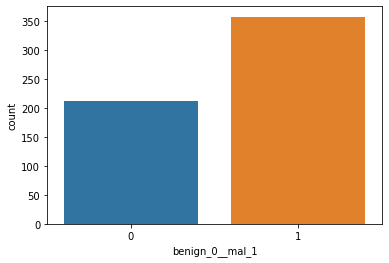

In [ ]:
sns.countplot(x='benign_0__mal_1',data=df)   # ok so balanced sets

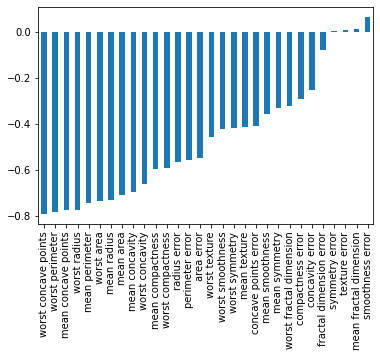

In [ ]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

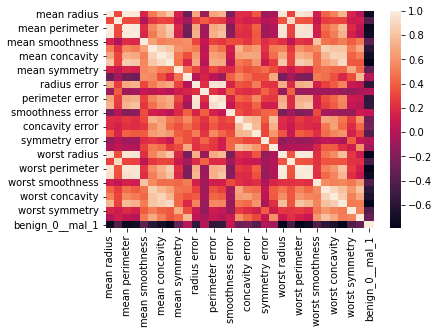

In [ ]:
sns.heatmap(df.corr())

In [ ]:
##############################################################

# Moving on to Splitting the Data (Train-Test) and Scaling

In [5]:
X = df.drop('benign_0__mal_1',axis=1).values

In [6]:
y = df['benign_0__mal_1'].values

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.25, random_state=101)

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler = MinMaxScaler()

In [11]:
X_train= scaler.fit_transform(X_train)

In [12]:
X_test= scaler.transform(X_test)

In [ ]:
##############################################################

# Moving on to Building our Artificial Neural Network

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [14]:
X_train.shape

(426, 30)

In [15]:
type(X_test)

numpy.ndarray

In [16]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [17]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs= 600)

Epoch 1/600
14/14 [==============================] - 1s 20ms/step - loss: 0.6805 - val_loss: 0.6451
Epoch 2/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6313 - val_loss: 0.6056
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5921 - val_loss: 0.5651
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5513 - val_loss: 0.5204
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5074 - val_loss: 0.4762
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4638 - val_loss: 0.4314
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4217 - val_loss: 0.3895
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3807 - val_loss: 0.3484
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3482 - val_loss: 0.3144
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3161 - val_loss: 0.2846
Epoch 11

In [ ]:
# And now let's plot the loss

In [18]:
losses= pd.DataFrame(model.history.history)

<AxesSubplot:>

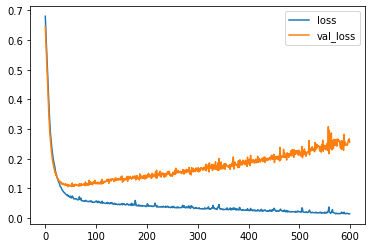

In [20]:
losses.plot()

In [ ]:
# Comment: We are clearly overfitting via high epochs
# Comment: Next we should introduce early stopping via callbacks

In [21]:
from tensorflow.keras.callbacks import EarlyStopping

In [22]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [ ]:
# Comment: Essential to redefine the model here

In [23]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [24]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs= 600,callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 15ms/step - loss: 0.7202 - val_loss: 0.6869
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6805 - val_loss: 0.6631
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6565 - val_loss: 0.6428
Epoch 4/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6365 - val_loss: 0.6225
Epoch 5/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6178 - val_loss: 0.6028
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5964 - val_loss: 0.5797
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5758 - val_loss: 0.5556
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5512 - val_loss: 0.5289
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5244 - val_loss: 0.5020
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4941 - val_loss: 0.4659
Epoch 11

In [25]:
losses= pd.DataFrame(model.history.history)

<AxesSubplot:>

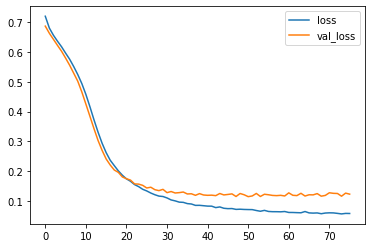

In [26]:
losses.plot()

In [28]:
# now add dropouts to try improve the model if possible
from tensorflow.keras.layers import Dropout

In [29]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

#below sigmoid since binary classification, critical!
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [30]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs= 600,callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 14ms/step - loss: 0.7294 - val_loss: 0.6763
Epoch 2/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6832 - val_loss: 0.6487
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6736 - val_loss: 0.6235
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6527 - val_loss: 0.6068
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6300 - val_loss: 0.5860
Epoch 6/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6114 - val_loss: 0.5679
Epoch 7/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5837 - val_loss: 0.5448
Epoch 8/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5666 - val_loss: 0.5210
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5613 - val_loss: 0.4973
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5293 - val_loss: 0.4744
Epoch 11

In [31]:
losses= pd.DataFrame(model.history.history)

<AxesSubplot:>

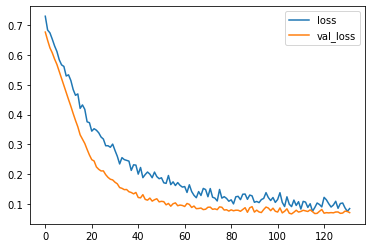

In [32]:
losses.plot()

In [ ]:
##############################################################

# Evaluating the model against our TEST set

In [33]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

5/5 [==============================] - 0s 2ms/step


In [34]:
from sklearn.metrics import confusion_matrix,classification_report

In [35]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [36]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 2 86]]


In [ ]:
# The model does very well on our validation set!